# Exploritory Analysis ⅠⅠⅠ

Exploritory Analysis of the Datasets to be used for <br>
Machine Learning Predictions of Exoplanet candidates <br>

The analyis will look briefly at:
- The Coandidates datset being used.
- The main features of the dataset
- If any of the features will be needed for the Classification Machine Learning

In [1]:
#imports
import pandas as pd
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# file import and dataframe creation
file = ('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative')
koi_df = pd.read_csv(file, low_memory=False)
koi_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


In [3]:
# the shappe and size of the imported dataset
koi_df.shape

(9564, 50)

These columns of interest can be used to check for possible data inbalance
for the machine learning model as well as basic statistics in reagards to
what will be outputted for the model classifications
<br>
<br>
__kepid__ : int<br>
arget identification number, as listed in the Kepler Input Catalog (KIC). <br>
The KIC was derived from a ground-based imaging survey of the Kepler field <br>
conducted prior to launch. <br>
<br>
<br>
__kepler_name__ : char<br>
Kepler number name in the form "Kepler-N," plus a lower-case letter,  <br>
<br>
<br>
__koi_score__ : float <br>
A value between 0 and 1 that indicates the confidence in the KOI disposition.<br>
For CANDIDATEs, a higher value indicates more confidence in its disposition, <br>
while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.<br>
<br>
<br>
__koi_disposition__ : Char<br>
The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, <br>
FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. All KOIs marked as CONFIRMED are also <br>
listed in the Exoplanet Archive Confirmed Planet table <br>
<br>
<br>
__koi_period__ : double <br>
The interval between consecutive planetary transits (days) <br>
<br>
<br>

In [4]:
# apply a count of confirmed planets and false positives
confirmed_df = koi_df.copy()
confirmed_df = confirmed_df[confirmed_df['koi_disposition'].str.contains('CONFIRMED', na=False) |
                          confirmed_df['koi_disposition'].str.contains('FALSE POSITIVE')]
confirmed_df = confirmed_df.groupby('koi_disposition')['kepid'].count()
confirmed_df = confirmed_df.to_frame()
confirmed_df.reset_index(inplace=True)
confirmed_df.rename(columns={'kepid':'count'}, inplace=True)
confirmed_df['%'] = (confirmed_df['count'] / confirmed_df['count'].sum())*100
confirmed_df = confirmed_df.sort_values(by='%', ascending=False)
confirmed_df.reset_index(drop= True, inplace=True)
confirmed_df

,koi_disposition,count,%
0,FALSE POSITIVE,4840,64.498934
1,CONFIRMED,2664,35.501066


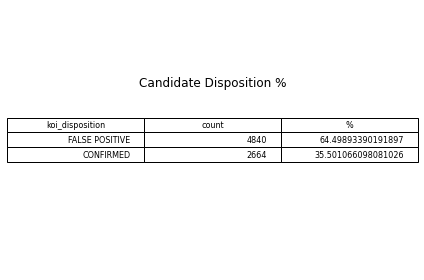

In [5]:
# plot a table
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=confirmed_df.values, colLabels = confirmed_df.columns, loc='center')

# disply and save the table
name = "Candidate Disposition %"
plt.title(name, y=1.0, pad=-80)
fig.tight_layout()
plt.savefig('./graphs/candidate_disposition_percent.jpg', bbox_inches="tight", dpi=300)
plt.show()

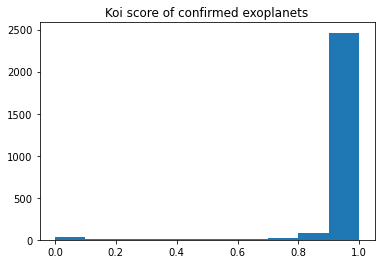

In [6]:
# plot the distribution of confirmed planets koi score
confirmed_exo_df = koi_df.copy()
confirmed_exo_df = confirmed_exo_df[confirmed_exo_df['koi_disposition'].str.contains('CONFIRMED', na=False)]
plt.subplot()
plt.hist(confirmed_exo_df['koi_score'])
plt.title('Koi score of confirmed exoplanets')


plt.savefig('./graphs/confirmed_koi_score.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [7]:
confirmed_exo_stats = confirmed_exo_df['koi_score'].describe()
confirmed_exo_stats = confirmed_exo_stats.to_frame()
confirmed_exo_stats.reset_index(inplace=True)
confirmed_exo_stats.rename(columns={'index':'Stat', 'koi_score':'Value'}, inplace=True)
confirmed_exo_stats

,Stat,Value
0,count,2650.000000
1,mean,0.964119
2,std,0.137348
3,min,0.000000
4,25%,0.992000
5,50%,1.000000
6,75%,1.000000
7,max,1.000000


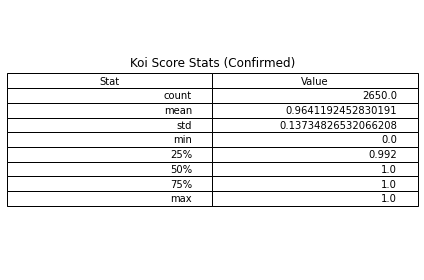

In [8]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=confirmed_exo_stats.values, colLabels = confirmed_exo_stats.columns, loc='center')

# disply and save the table
name = "Koi Score Stats (Confirmed)"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/koi_score_confirmed_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

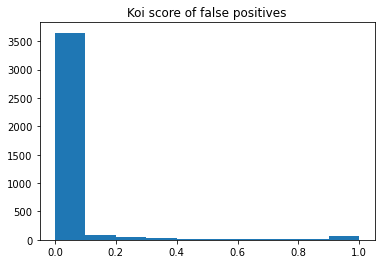

In [9]:
# plot the distribution of false positive planets koi score
false_exo_df = koi_df.copy()
false_exo_df = false_exo_df[false_exo_df['koi_disposition'].str.contains('FALSE POSITIVE', na=False)]
plt.subplot()
plt.hist(false_exo_df['koi_score'])
plt.title('Koi score of false positives')


plt.savefig('./graphs/false_koi_score.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [10]:
false_exo_stats = false_exo_df['koi_score'].describe()
false_exo_stats = false_exo_stats.to_frame()
false_exo_stats.reset_index(inplace=True)
false_exo_stats.rename(columns={'index':'Stat', 'koi_score':'Value'}, inplace=True)
false_exo_stats

,Stat,Value
0,count,3946.000000
1,mean,0.038105
2,std,0.158799
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,1.000000


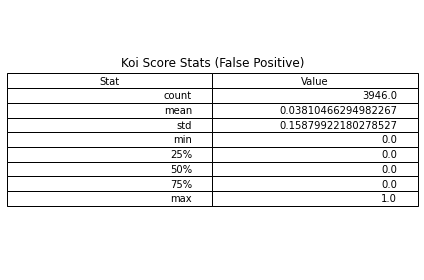

In [11]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=false_exo_stats.values, colLabels = false_exo_stats.columns, loc='center')

# disply and save the table
name = "Koi Score Stats (False Positive)"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/koi_score_false_positive_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()